# Fraud Detection Project

This project aims to build a machine learning model to detect fraudulent activities in an auto insurance company’s claims. The model will help in drastically reducing losses due to fraud.

## Project Overview
The objective of this project is to create a robust fraud detection system using machine learning. The system will classify insurance claims as either fraudulent or non-fraudulent based on historical data.


In [4]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
# Loading the datasetinto a pandas dataframe
data = pd.read_csv('AutoInsClaims.csv')

In [6]:
# Dissplaying the first 5 rows of the dataset
data.head()

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,...,GENDER,BIRTHDATE,SSN,DRIVERS_LICENSE_ID,DRIVERS_LICENSE_EXPIRY,DRIVERS_LICENSE_STATE,DATE_AT_CURRENT_ADDRESS,CONTACT_NUMBER,EMAIL,COMMUTE_DISCOUNT
0,CH42335,XZJ2837,NW5567882,A-2017-UU907,3,NaN,1,157654.9,4/25/17,4/28/17,...,M,12/25/73,457-20-9007,X151-5971-1594,8/19/18,IL,4/16/99,634-603-0960,wdorau@freshmaail.com,0
1,IH49805,VVR6423,UR4864804,A-2018-FI481,3,NaN,3,226154.5,8/26/18,8/31/18,...,F,9/14/45,718-38-8987,K702-7678-1851,1/27/18,IL,6/9/11,827-916-0381,tmostrom@yahoot.com,0
2,AF28736,UQM2512,RR8595908,A-2016-ZG694,1,NaN,1,83968.6,1/7/16,1/11/16,...,F,5/16/88,076-62-7083,V549-5272-3181,11/19/19,IL,5/21/05,723-552-0479,esebranek@zohoo.com,0
3,EF53594,YDT5591,RN5640634,A-2016-NG783,1,NaN,1,309570.3,12/11/16,12/18/16,...,M,1/18/74,571-32-3662,Z350-2956-6553,5/16/19,IL,3/11/00,741-637-0631,dnickless@life.com,0
4,LD32277,ONM5465,YY1229530,A-2017-ZO863,3,NaN,3,136633.9,6/6/17,6/8/17,...,M,5/1/50,315-84-4443,E912-8544-3880,7/6/20,IL,7/4/12,735-427-0152,fliggan@mooosend.com,0


In [7]:
# Displaying the last 5 rows of the dataset
data.tail()

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,...,GENDER,BIRTHDATE,SSN,DRIVERS_LICENSE_ID,DRIVERS_LICENSE_EXPIRY,DRIVERS_LICENSE_STATE,DATE_AT_CURRENT_ADDRESS,CONTACT_NUMBER,EMAIL,COMMUTE_DISCOUNT
970,CM11612,GJI9724,QY3512250,A-2016-TJ210,3,NaN,1,77438.7,11/29/16,12/1/16,...,F,11/10/79,037-94-2844,E550-8174-2772,6/23/18,IL,6/21/15,841-453-0442,mino@gmxx.com,0
971,HM55275,ORD4650,XR9202123,A-2016-EU678,1,NaN,3,219285.9,8/14/16,8/21/16,...,M,2/1/69,557-54-2527,Z266-2079-9402,8/16/19,IL,5/11/14,359-431-0768,glavorato@yahoot.com,0
972,BA79937,BLV8655,TU0769843,A-2016-MT971,1,NaN,1,192320.1,8/22/16,9/3/16,...,M,9/21/55,006-98-8737,J721-8375-9029,12/24/19,IL,1/14/14,738-442-0942,dsprosty@yahoot.com,1
973,AL29368,XBH9030,UU9571126,A-2017-ZX388,2,NaN,3,273023.9,1/24/17,2/4/17,...,M,10/25/69,868-35-5110,M268-6803-2588,9/17/20,IL,2/11/10,362-923-0983,tbatinich@outloop.com,0
974,CK27900,BZQ1079,SV2796501,A-2016-GP477,2,NaN,3,178004.2,7/5/16,7/9/16,...,M,6/6/82,102-92-0717,F517-3734-6548,7/22/20,IL,9/12/03,258-701-0559,nhessling@life.com,0


In [8]:
# Displaying the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HOUSEHOLD_ID             975 non-null    object 
 1   DRIVER_ID                975 non-null    object 
 2   POLICY_ID                975 non-null    object 
 3   CLAIM_ID                 975 non-null    object 
 4   INCIDENT_CAUSE           975 non-null    int64  
 5   DESCRIPTION              0 non-null      float64
 6   CLAIM_STATUS             975 non-null    int64  
 7   ODOMETER_AT_LOSS         975 non-null    float64
 8   LOSS_EVENT_TIME          975 non-null    object 
 9   CLAIM_INIT_TIME          975 non-null    object 
 10  POLICE_REPORT            975 non-null    int64  
 11  CLAIMS_AT_LOSS_DATE      975 non-null    int64  
 12  LOSS_LOCATION_LAT        975 non-null    float64
 13  LOSS_LOCATION_LONG       975 non-null    float64
 14  CLAIM_AMOUNT             9

In [9]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

HOUSEHOLD_ID                 0
DRIVER_ID                    0
POLICY_ID                    0
CLAIM_ID                     0
INCIDENT_CAUSE               0
DESCRIPTION                975
CLAIM_STATUS                 0
ODOMETER_AT_LOSS             0
LOSS_EVENT_TIME              0
CLAIM_INIT_TIME              0
POLICE_REPORT                0
CLAIMS_AT_LOSS_DATE          0
LOSS_LOCATION_LAT            0
LOSS_LOCATION_LONG           0
CLAIM_AMOUNT                 0
FLAG_FOR_FRAUD_INV           0
PRIMARY_DRIVER_ID            0
START_DATE                   0
EXPIRY_DATE                  0
MODEL_YEAR                   0
MAKE                         0
MODEL                        0
PLATE                        0
COLOR                        0
INITIAL_ODOMETER             0
LOW_MILEAGE_USE              0
FIRST_NAME                   0
LAST_NAME                    0
GENDER                       0
BIRTHDATE                    0
SSN                          0
DRIVERS_LICENSE_ID           0
DRIVERS_

In [10]:
# Checking the data types
data.dtypes

HOUSEHOLD_ID                object
DRIVER_ID                   object
POLICY_ID                   object
CLAIM_ID                    object
INCIDENT_CAUSE               int64
DESCRIPTION                float64
CLAIM_STATUS                 int64
ODOMETER_AT_LOSS           float64
LOSS_EVENT_TIME             object
CLAIM_INIT_TIME             object
POLICE_REPORT                int64
CLAIMS_AT_LOSS_DATE          int64
LOSS_LOCATION_LAT          float64
LOSS_LOCATION_LONG         float64
CLAIM_AMOUNT               float64
FLAG_FOR_FRAUD_INV           int64
PRIMARY_DRIVER_ID           object
START_DATE                  object
EXPIRY_DATE                 object
MODEL_YEAR                   int64
MAKE                        object
MODEL                       object
PLATE                       object
COLOR                       object
INITIAL_ODOMETER             int64
LOW_MILEAGE_USE              int64
FIRST_NAME                  object
LAST_NAME                   object
GENDER              

In [11]:
# Changing the data type of the date columns
data['LOSS_EVENT_TIME'] = pd.to_datetime(data['LOSS_EVENT_TIME'])
data['CLAIM_INIT_TIME'] = pd.to_datetime(data['CLAIM_INIT_TIME'])
data['CLAIMS_AT_LOSS_DATE'] = pd.to_datetime(data['CLAIMS_AT_LOSS_DATE'])
data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['EXPIRY_DATE'] = pd.to_datetime(data['EXPIRY_DATE'])
data['MODEL_YEAR'] = pd.to_datetime(data['MODEL_YEAR'])
data['BIRTHDATE'] = pd.to_datetime(data['BIRTHDATE'])
data['DRIVERS_LICENSE_EXPIRY'] = pd.to_datetime(data['DRIVERS_LICENSE_EXPIRY'])
data['DATE_AT_CURRENT_ADDRESS'] = pd.to_datetime(data['DATE_AT_CURRENT_ADDRESS'])

data.dtypes

/tmp/ipykernel_368151/1026242544.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['LOSS_EVENT_TIME'] = pd.to_datetime(data['LOSS_EVENT_TIME'])
/tmp/ipykernel_368151/1026242544.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CLAIM_INIT_TIME'] = pd.to_datetime(data['CLAIM_INIT_TIME'])
/tmp/ipykernel_368151/1026242544.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['START_DATE'] = pd.to_datetime(data['START_DATE'])
/tmp/ipykernel_368151/1026242544.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to 

HOUSEHOLD_ID                       object
DRIVER_ID                          object
POLICY_ID                          object
CLAIM_ID                           object
INCIDENT_CAUSE                      int64
DESCRIPTION                       float64
CLAIM_STATUS                        int64
ODOMETER_AT_LOSS                  float64
LOSS_EVENT_TIME            datetime64[ns]
CLAIM_INIT_TIME            datetime64[ns]
POLICE_REPORT                       int64
CLAIMS_AT_LOSS_DATE        datetime64[ns]
LOSS_LOCATION_LAT                 float64
LOSS_LOCATION_LONG                float64
CLAIM_AMOUNT                      float64
FLAG_FOR_FRAUD_INV                  int64
PRIMARY_DRIVER_ID                  object
START_DATE                 datetime64[ns]
EXPIRY_DATE                datetime64[ns]
MODEL_YEAR                 datetime64[ns]
MAKE                               object
MODEL                              object
PLATE                              object
COLOR                             

In [12]:
data.dtypes

HOUSEHOLD_ID                       object
DRIVER_ID                          object
POLICY_ID                          object
CLAIM_ID                           object
INCIDENT_CAUSE                      int64
DESCRIPTION                       float64
CLAIM_STATUS                        int64
ODOMETER_AT_LOSS                  float64
LOSS_EVENT_TIME            datetime64[ns]
CLAIM_INIT_TIME            datetime64[ns]
POLICE_REPORT                       int64
CLAIMS_AT_LOSS_DATE        datetime64[ns]
LOSS_LOCATION_LAT                 float64
LOSS_LOCATION_LONG                float64
CLAIM_AMOUNT                      float64
FLAG_FOR_FRAUD_INV                  int64
PRIMARY_DRIVER_ID                  object
START_DATE                 datetime64[ns]
EXPIRY_DATE                datetime64[ns]
MODEL_YEAR                 datetime64[ns]
MAKE                               object
MODEL                              object
PLATE                              object
COLOR                             

In [13]:
#  Dropping the columns that are not needed (Columns with too many missing values and personal information)
data.drop(['DESCRIPTION', 'FIRST_NAME', 'LAST_NAME', 'SSN', 'CONTACT_NUMBER', 'EMAIL'], axis=1, inplace=True)

data.head()



,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,POLICE_REPORT,...,COLOR,INITIAL_ODOMETER,LOW_MILEAGE_USE,GENDER,BIRTHDATE,DRIVERS_LICENSE_ID,DRIVERS_LICENSE_EXPIRY,DRIVERS_LICENSE_STATE,DATE_AT_CURRENT_ADDRESS,COMMUTE_DISCOUNT
0,CH42335,XZJ2837,NW5567882,A-2017-UU907,3,1,157654.9,2017-04-25,2017-04-28,1,...,Silver,144972,0,M,2073-12-25,X151-5971-1594,2018-08-19,IL,1999-04-16,0
1,IH49805,VVR6423,UR4864804,A-2018-FI481,3,3,226154.5,2018-08-26,2018-08-31,0,...,White,212580,0,F,2045-09-14,K702-7678-1851,2018-01-27,IL,2011-06-09,0
2,AF28736,UQM2512,RR8595908,A-2016-ZG694,1,1,83968.6,2016-01-07,2016-01-11,0,...,White,77994,1,F,1988-05-16,V549-5272-3181,2019-11-19,IL,2005-05-21,0
3,EF53594,YDT5591,RN5640634,A-2016-NG783,1,1,309570.3,2016-12-11,2016-12-18,0,...,White,296352,0,M,1974-01-18,Z350-2956-6553,2019-05-16,IL,2000-03-11,0
4,LD32277,ONM5465,YY1229530,A-2017-ZO863,3,3,136633.9,2017-06-06,2017-06-08,0,...,White,134244,0,M,2050-05-01,E912-8544-3880,2020-07-06,IL,2012-07-04,0


In [14]:
# Distribution of the legit and fraudulant claims
data['FLAG_FOR_FRAUD_INV'].value_counts()

FLAG_FOR_FRAUD_INV
0    569
1    406
Name: count, dtype: int64

This Dataset is Balanced as the proportions of the target variables are close to 50-50.

0 --> Normal / Legit Claims

1 --> Fraudulent Claims

In [15]:
# Separating the data for analysis
legit = data[data['FLAG_FOR_FRAUD_INV'] == 0]
fraud = data[data['FLAG_FOR_FRAUD_INV'] == 1]

In [16]:
# Checking the shape of the legit and fraud data
print(legit.shape)
print(fraud.shape)

(569, 32)
(406, 32)


In [17]:
# Statistical summary of the legit claim amount
legit.CLAIM_AMOUNT.describe()

count      569.000000
mean      2521.147627
std       2600.199841
min       1000.000000
25%       1530.000000
50%       2090.000000
75%       2620.000000
max      18457.500000
Name: CLAIM_AMOUNT, dtype: float64

In [18]:
# Statistical summary of the fraud claim amount
fraud.CLAIM_AMOUNT.describe()

count      406.000000
mean     26429.480296
std      10361.448267
min       1950.000000
25%      20207.500000
50%      27320.000000
75%      33746.875000
max      48035.500000
Name: CLAIM_AMOUNT, dtype: float64

In [19]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.groupby('FLAG_FOR_FRAUD_INV').mean()


,INCIDENT_CAUSE,CLAIM_STATUS,ODOMETER_AT_LOSS,POLICE_REPORT,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,INITIAL_ODOMETER,LOW_MILEAGE_USE,COMMUTE_DISCOUNT
FLAG_FOR_FRAUD_INV,,,,,,,,,,
0,2.926186,2.977153,180783.846046,0.281195,41.857895,-87.675014,2521.147627,173128.724077,0.094903,0.068541
1,3.041872,1.103448,175504.046305,0.637931,41.860133,-87.679617,26429.480296,167987.467980,0.088670,0.049261


In [20]:
data['FLAG_FOR_FRAUD_INV'].value_counts()

FLAG_FOR_FRAUD_INV
0    569
1    406
Name: count, dtype: int64

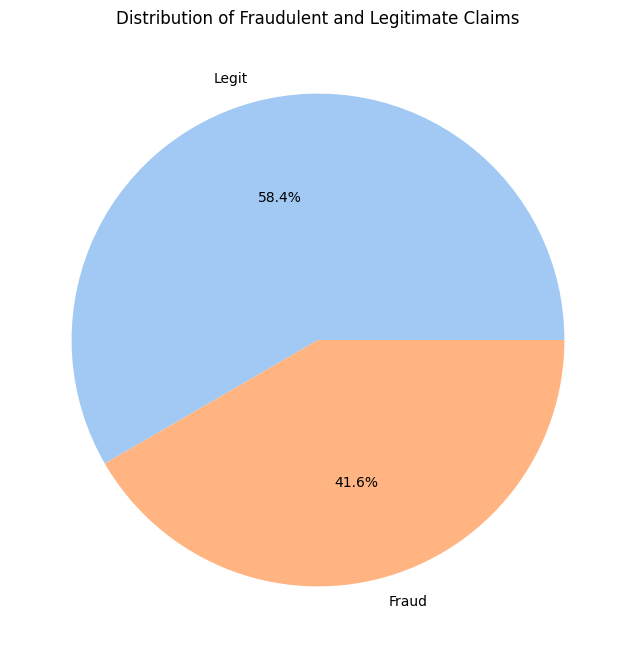

In [21]:
# Calculating the value counts for each category
data_counts = pd.Series({'Legit': len(legit), 'Fraud': len(fraud)})

# Create a pie chart using seaborn and matplotlib
plt.figure(figsize=(8, 8))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Fraudulent and Legitimate Claims')
plt.show()

The Correlation heatmap

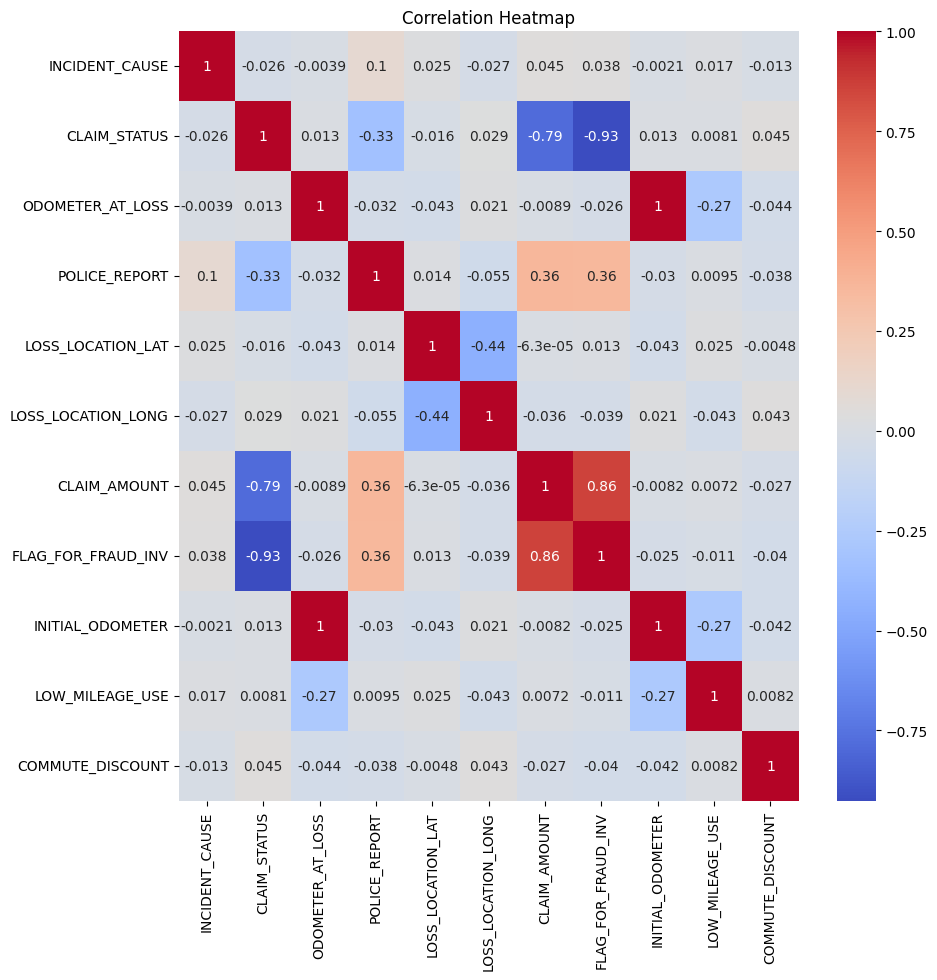

In [40]:
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Under Sampling

Build a sample dataset that will have a balanced values for the Legit and Fraudulent claims

The number of fraudulent transactions is --> 406

In [22]:
# Creating the sample dataset containing equal number of legit and fraudulant claims
legit_sample = legit.sample(n=406, random_state=42)

Concatinating two data frames, the legit and fraudulent dataframes

In [23]:
# Concatenating the legit_sample and fraud data
new_data = pd.concat([legit_sample, fraud], axis=0) 

In [24]:
new_data.shape

(812, 32)

In [25]:
new_data.head()

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,POLICE_REPORT,...,COLOR,INITIAL_ODOMETER,LOW_MILEAGE_USE,GENDER,BIRTHDATE,DRIVERS_LICENSE_ID,DRIVERS_LICENSE_EXPIRY,DRIVERS_LICENSE_STATE,DATE_AT_CURRENT_ADDRESS,COMMUTE_DISCOUNT
352,LL12094,OWU7498,TY4686682,A-2017-SF986,4,3,305265.3,2017-11-10,2017-11-10,0,...,Dark Red,292032,0,F,2058-05-25,N927-7383-5567,2019-12-18,IL,2003-07-03,0
118,IF14793,CNP5087,TW3112496,A-2018-GT731,2,3,104793.7,2018-07-07,2018-07-21,0,...,Med Dk Blue,99120,0,M,2038-04-20,F925-7114-8720,2019-01-30,IL,2001-08-10,0
229,KB13759,RDF5532,RU4143795,A-2016-UJ516,5,3,187053.8,2016-06-19,2016-06-23,0,...,Dark Red,181332,0,F,2069-02-25,S667-2232-9695,2021-02-16,IL,1999-03-17,0
731,MB26629,IIO4719,WS4501594,A-2018-JZ174,5,3,180931.1,2018-08-04,2018-08-12,0,...,Black,173988,0,M,2036-02-16,G226-1490-2608,2018-08-09,IL,2001-02-23,0
926,ED70515,VOJ6529,RY8468834,A-2017-VV783,4,3,163193.3,2017-03-14,2017-03-22,0,...,Med Dk Blue,151320,0,M,2069-03-09,O209-4951-9469,2021-04-21,IL,2004-07-04,0


In [26]:
# Checking the distribution of the legit and fraudulant claimm in the new dataset
new_data['FLAG_FOR_FRAUD_INV'].value_counts()

FLAG_FOR_FRAUD_INV
0    406
1    406
Name: count, dtype: int64

In [27]:
# Separating the numeric columns in the new dataset
new_numeric_data = new_data.select_dtypes(include=np.number)

# Checking the mean of the numeric columns in the new dataset 
new_numeric_data.groupby('FLAG_FOR_FRAUD_INV').mean()

,INCIDENT_CAUSE,CLAIM_STATUS,ODOMETER_AT_LOSS,POLICE_REPORT,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,INITIAL_ODOMETER,LOW_MILEAGE_USE,COMMUTE_DISCOUNT
FLAG_FOR_FRAUD_INV,,,,,,,,,,
0,2.948276,2.982759,173682.460837,0.275862,41.856771,-87.674595,2474.621921,165957.295567,0.103448,0.073892
1,3.041872,1.103448,175504.046305,0.637931,41.860133,-87.679617,26429.480296,167987.467980,0.088670,0.049261


Splitting the data into features (the rest like claim amount) and targets (zero's and one's)

In [28]:
# X is the feature columns
X = new_numeric_data.drop('FLAG_FOR_FRAUD_INV', axis=1)

# Y is the target column
Y = new_numeric_data['FLAG_FOR_FRAUD_INV']

In [29]:
X

,INCIDENT_CAUSE,CLAIM_STATUS,ODOMETER_AT_LOSS,POLICE_REPORT,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,INITIAL_ODOMETER,LOW_MILEAGE_USE,COMMUTE_DISCOUNT
352,4,3,305265.3,0,42.005212,-87.673607,1100.0,292032,0,0
118,2,3,104793.7,0,41.714233,-87.642857,2420.0,99120,0,0
229,5,3,187053.8,0,41.921288,-87.654836,2150.0,181332,0,0
731,5,3,180931.1,0,41.881990,-87.625098,1790.0,173988,0,0
926,4,3,163193.3,0,41.961243,-87.712761,2040.0,151320,0,0
...,...,...,...,...,...,...,...,...,...,...
961,3,1,172496.5,1,41.765291,-87.604544,32960.0,166176,0,1
965,3,1,53558.5,0,41.957653,-87.705837,2730.0,42552,0,1
968,4,1,105133.8,1,41.946016,-87.764442,33210.0,95880,0,1
970,3,1,77438.7,1,41.876984,-87.742824,44666.0,70416,0,0


In [30]:
Y

352    0
118    0
229    0
731    0
926    0
      ..
961    1
965    1
968    1
970    1
972    1
Name: FLAG_FOR_FRAUD_INV, Length: 812, dtype: int64

Split the data into Training Data and Testing Data

In [31]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [32]:
# Checking the shape of the X_train, X_test, Y_train and Y_test
X.shape, X_train.shape, X_test.shape

((812, 10), (649, 10), (163, 10))

Model Training

Logistic Regression

In [33]:
# Creating the model
model = LogisticRegression()

In [34]:
# Training the Logistic Regresion model with Training data
model.fit(X_train, Y_train)

/home/chemweno/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [35]:
# Accuracy on he training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [36]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9845916795069337


In [37]:
# Accuracy on the testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [41]:
print('Accuracy on testing data : ', testing_data_accuracy)

Accuracy on testing data :  0.9877300613496932


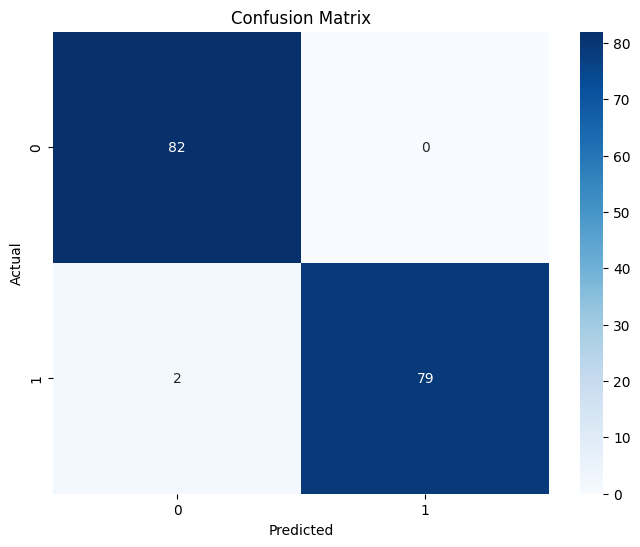

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Interpretation

    True Negatives (TN): 82
        These are legitimate transactions that were correctly predicted as legitimate. This indicates a strong performance in correctly identifying non-fraudulent transactions.

    False Positives (FP): 0
        There are no legitimate transactions incorrectly predicted as fraud. This suggests the model is very good at avoiding false alarms where legitimate transactions are mistakenly flagged as fraud.

    False Negatives (FN): 2
        These are fraudulent transactions that were incorrectly predicted as legitimate. This indicates that the model missed 2 fraudulent transactions, which is a small number relative to the total.

    True Positives (TP): 79
        These are fraudulent transactions correctly predicted as fraud. This shows the model is effective at identifying actual fraud cases.